# Machine learning on MNIST

## Import libraries

In [2]:
%load_ext autoreload
%autoreload 2

import random
import gzip, pickle
import numpy as np
import matplotlib.pyplot as plt

from src.neuralnetwork.activations import Tanh, Sigmoid, Softmax, ReLU, PReLU, Swish
from src.neuralnetwork.losses import MSE
from src.neuralnetwork.layers import Dense
from src.neuralnetwork.model import Model

## Load data

In [3]:
def load_data():
    with gzip.open('data/mnist.pkl.gz', 'rb') as f:
        f.seek(0)
        training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
        return (training_data, validation_data, test_data)

In [4]:
training_data, validation_data, test_data = load_data()

[5 0 4 1 9 2]


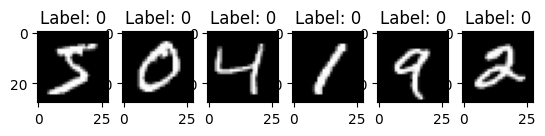

In [5]:
def view_image(images):
    n: int = len(images)
    f = plt.figure()

    for i in range(n):
        f.add_subplot(1, n, i + 1)
        reshape_img = images[i].reshape((28, 28))
        normalize_img = reshape_img/255
        plt.title('Label: {label}'.format(label = np.argmax(training_data[1][i])))
        plt.imshow(normalize_img, cmap="gray")
        #plt.show(block=True)


view_image(training_data[0][:6])

print(training_data[1][:6])


In [6]:
input = training_data[0]

output = np.zeros((training_data[1].shape[0], 10))
for i in range(training_data[1].shape[0]):
    output[i, training_data[1][i]] = 1

input = input.reshape((50000, 784, 1))
output = output.reshape((50000, 10, 1))

## Define model

In [27]:
%reload_ext autoreload

network = [
    Dense(784, 128),
    Tanh(),
    Dense(128, 40),
    Tanh(),
    Dense(40, 10),
    Softmax()
]

model = Model(network, MSE())

## Train model

In [28]:
model.train(input, output, epochs=20, learning_rate=0.1, batch_size=10)

epoch 1/20   batch 5000/5000   error=698.392475   accuracy=17.07
epoch 2/20   batch 5000/5000   error=585.805136   accuracy=28.79
epoch 3/20   batch 5000/5000   error=491.137246   accuracy=39.10
epoch 4/20   batch 5000/5000   error=424.087611   accuracy=46.65
epoch 5/20   batch 5000/5000   error=384.254321   accuracy=50.81
epoch 6/20   batch 5000/5000   error=353.038719   accuracy=54.07
epoch 7/20   batch 5000/5000   error=324.342356   accuracy=57.20
epoch 8/20   batch 5000/5000   error=302.346316   accuracy=59.60
epoch 9/20   batch 5000/5000   error=256.320190   accuracy=65.78
epoch 10/20   batch 5000/5000   error=209.021790   accuracy=72.88
epoch 11/20   batch 5000/5000   error=188.977704   accuracy=75.34
epoch 12/20   batch 5000/5000   error=175.059581   accuracy=76.87
epoch 13/20   batch 5000/5000   error=160.165875   accuracy=78.68
epoch 14/20   batch 5000/5000   error=148.103204   accuracy=80.13
epoch 15/20   batch 5000/5000   error=139.012193   accuracy=81.42
epoch 16/20   batch

In [31]:
model.test(input, output)

error=0.055705 | accuracy=64.28


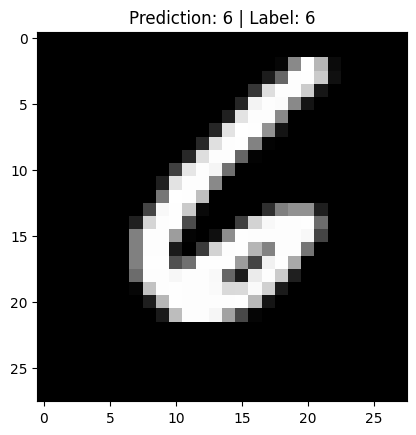

In [32]:
def view_prediction(index, input, output):
    prediction = model.predict(input[index, :])

    k = input[index, :].reshape((28, 28))

    plt.title('Prediction: {pred} | Label: {label}'.format(
        pred=np.argmax(prediction), label=np.argmax(output[index])))
    plt.imshow(k, cmap='gray')


view_prediction(random.randint(0, input.shape[0]), input, output)


In [33]:
input_test = test_data[0].reshape((10000, 784, 1))

output_test = np.zeros((test_data[1].shape[0], 10))
for i in range(test_data[1].shape[0]):
    output_test[i, test_data[1][i]] = 1

output_test = output_test.reshape((10000, 10, 1))

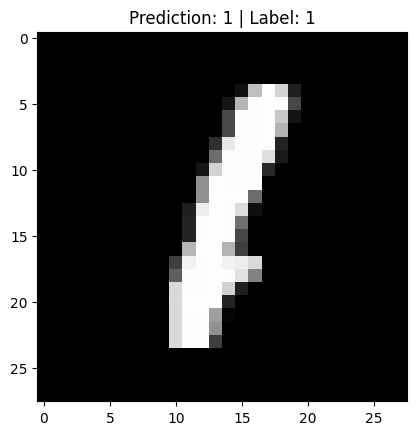

In [34]:
view_prediction(random.randint(0, test_data[0].shape[0]), input_test, output_test)

In [35]:
def global_check(x, y):
    error_list = []

    for i in range(len(x)):
        prediction = model.predict(x[i,:])
        if(np.argmax(prediction) != np.argmax(y[i])):
            error_list.append(i)
    
    return error_list

error_list = global_check(input, output)

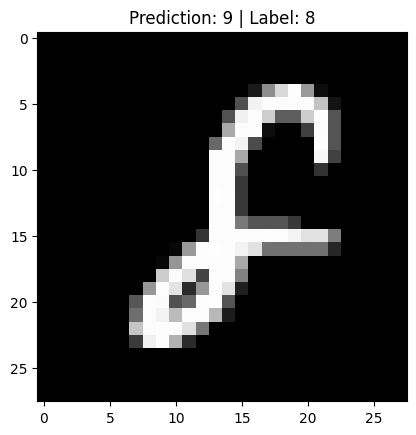

In [36]:
view_prediction(error_list[random.randint(0, len(error_list))], input, output)

In [37]:
len(error_list)

17862

In [38]:
import dill as pickle
from pathlib import Path

Path("output/").mkdir(parents=True, exist_ok=True)

with open('output/model.pkl', 'wb') as f:
    pickle.dump(model, f)